<a href="https://colab.research.google.com/github/Vishnu-77-cpu/Protugese-Bank-Management/blob/main/PRCP_1000_ProtugeseBank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🏦 **Portuguese Bank Marketing Campaign Analysis**
### 📊 *Exploratory Data Analysis (EDA) & Predictive Modeling Project*

---
### **Problem Statement :**

Task 1 : Prepare a complete data analysis report on the given data.

Task 2 : Create a predictive model which helps the bank marketing team to know which customer will buy the product.

Task 3 : Provide suggestions to the bank marketing team to improve customer buying rate.

---

### 🧾 **Submitted To:**  
**DataMites Internship Team**

### 👩‍💻 **Prepared By:**  
**Vishnu K**

**NaveenKumar K**

### 📅 **Date:**  
**November 2025**

---

## 🎯 **Project Overview**

This project analyzes the **Portuguese Bank Marketing Campaign dataset** to find which customers are most likely to **subscribe to a term deposit** after being contacted by the bank.

By performing **Exploratory Data Analysis (EDA)** and building a **Predictive Model**, we aim to:

- Discover hidden patterns in customer and campaign data  
- Identify key economic indicators influencing decisions  
- Provide actionable insights to improve future marketing campaigns    

---

## 🧩 **Dataset Source & Dataset Description**

📊 **Dataset Name:** Portuguese Bank Marketing Dataset  
🏦 **Provided By:** Portuguese Banking Institution  
📅 **Duration:** May 2008 – November 2010  

📄 **Dataset Link:**  
[Portuguese Bank Dataset (Download Here)](https://d3ilbtxij3aepc.cloudfront.net/projects/CDS-Capstone-Projects/PRCP-1000-ProtugeseBank.zip)

🔹 The dataset includes information about **bank marketing campaigns**, their **customers**, and **economic indicators**.  
🔹 The goal is to predict whether a customer will **subscribe to a term deposit (y = yes/no)**.

---

| Category | Description | Example |
|-----------|--------------|----------|
| age | Age of the client | 35 |
| job | Job type | admin., technician |
| marital | Marital status | single, married |
| education | Education level | university.degree |
| default | Has credit in default? | yes/no |
| housing | Has a housing loan? | yes/no |
| loan | Has a personal loan? | yes/no |
| contact | Communication type | cellular/telephone |
| month | Last contact month | may, jul |
| day_of_week | Day of week | mon, tue |
| duration | Last contact duration (sec) | 300 |
| campaign | Number of contacts in this campaign | 2 |
| pdays | Days since last contact | 999 |
| previous | Previous contacts | 1 |
| poutcome | Outcome of previous campaign | success/failure |
| emp.var.rate | Employment variation rate | 1.1 |
| cons.price.idx | Consumer price index | 93.200 |
| cons.conf.idx | Consumer confidence index | -40.0 |
| euribor3m | Euribor 3-month rate | 4.857 |
| nr.employed | Number of employees | 5191.0 |
| y | Client subscribed term deposit? | yes/no |

---

## 🧰 **Tools & Libraries**

| Category | Libraries | Purpose |
|-----------|------------|----------|
| Data Handling | **pandas**, **numpy** | Data manipulation |
| Visualization | **matplotlib**, **seaborn** | Data exploration |
| Modeling | **scikit-learn**, **xgboost** | Machine learning |
| Imbalance Handling | **imblearn (SMOTE)** | Class balance correction |

---


#  **Step 1 – Data Collection**

---

### 🎯 **Goal**
To collect and load the Portuguese Bank Marketing dataset into the environment for further analysis.

---




##  Import Libraries

In [ ]:
# Data handling and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set display style
sns.set(style="whitegrid")


##  Load the Dataset

* The dataset file required: `bank-additional-full.csv `(from the project ZIP under` Data > bank-additional`).

* Place it in the notebook working directory or change `DATA_PATH` below to the correct path.

In [ ]:
df=pd.read_csv('bank-additional-full.csv' , sep=";")

*Note: The dataset uses semicolons (;) instead of commas, so we specify sep=';'.*

##  Preview the Data

In [ ]:
df.head() # to get top 5 rows

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


*-> This helps you see what columns are available and check for any formatting issues*

## Basic Dataset Info

In [ ]:
# check for the df structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

*-> This shows column names, data types, and missing value counts.*

## Shape and Columns

In [ ]:
df.shape  # to find the shape of the data


(41188, 21)

In [ ]:
# To check columns names in the Data
df.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

*-> Gives you an overview of dataset size and features (columns).*

## Summary Statistics

In [ ]:
# Numeric summary
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


*-> 📊 Helps you understand numeric data distributions, min, max, mean, etc.*

## Unique Values per Column

In [ ]:
df.nunique() # to find the unique values

,0
age,78
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5


*-> This tells how many different values exist in each column (useful before EDA)*

# **Step 2 – Exploratory Data Analysis (EDA)**

---



---

### 🎯 **Goal**
To explore and understand the dataset — its structure, missing values, feature types, and relationships that affect whether a client subscribes to a term deposit (`y`).

---

##Data Quality Check

In [ ]:
# To Find Missing Values
missing_values = df.isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


In [ ]:
#Find unknown values in each columns in Dataset
df.apply(lambda x:(x == "unknown").sum())

,0
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [ ]:
# Count duplicate rows
duplicate_count = df.duplicated().sum()
duplicate_count


np.int64(12)

*There are 12 rows in the dataset that are exactly the same as another row.*

In [ ]:
# Removes 12 duplicate rows
df = df.drop_duplicates()

In [ ]:
# Confirm removal
print("After removing duplicates, new shape:", df.shape)

After removing duplicates, new shape: (41176, 21)


In [ ]:
df.dtypes

,0
age,int64
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
day_of_week,object


In [ ]:
# Check if Numeric Columns Contain Non-Numeric Values
for col in df.columns:
    if df[col].dtype == 'object':
        if df[col].str.isnumeric().sum() > 0:
            print("Numeric values inside object column:", col)


*>> Non-Numeric Values are not present in Numeric Columns*

##Target Variable Distribution


In [ ]:
df['y'].value_counts()

,count
y,
no,36537
yes,4639


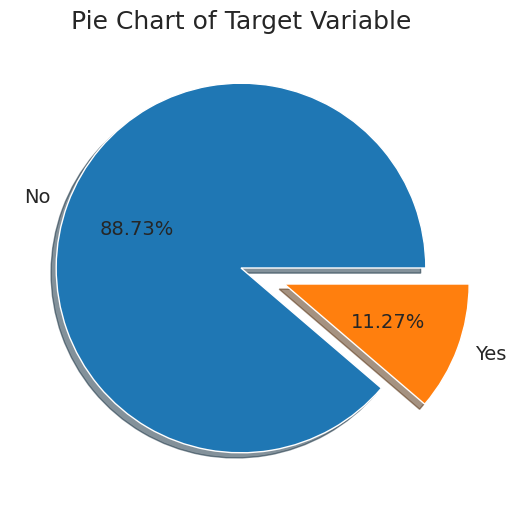

In [ ]:
# Pie chart of the target variable

target_labels = 'No', 'Yes'
target_counts = [df.y[df.y=="no"].count(), df.y[df.y=="yes"].count()]

explode = (0, 0.25)

plt.figure(figsize=(6,6))
cmap = plt.get_cmap('tab20')
colors = [cmap(i) for i in np.linspace(0, 1, 8)]

target_pie = plt.pie(target_counts, labels=target_labels, explode=explode, autopct='%1.2f%%',
                     textprops={'fontsize': 14}, shadow=True, colors=colors)
plt.title('Pie Chart of Target Variable', fontsize=18)
plt.show()

###Numerical Columns Analysis

###*>>Identify Numerical Columns*

In [ ]:
num_col=df.select_dtypes(include=['int64','float64']).columns
num_col ##These are all numeric features to be visualized and analyzed.

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

###*>>Distribution of Numerical Features*

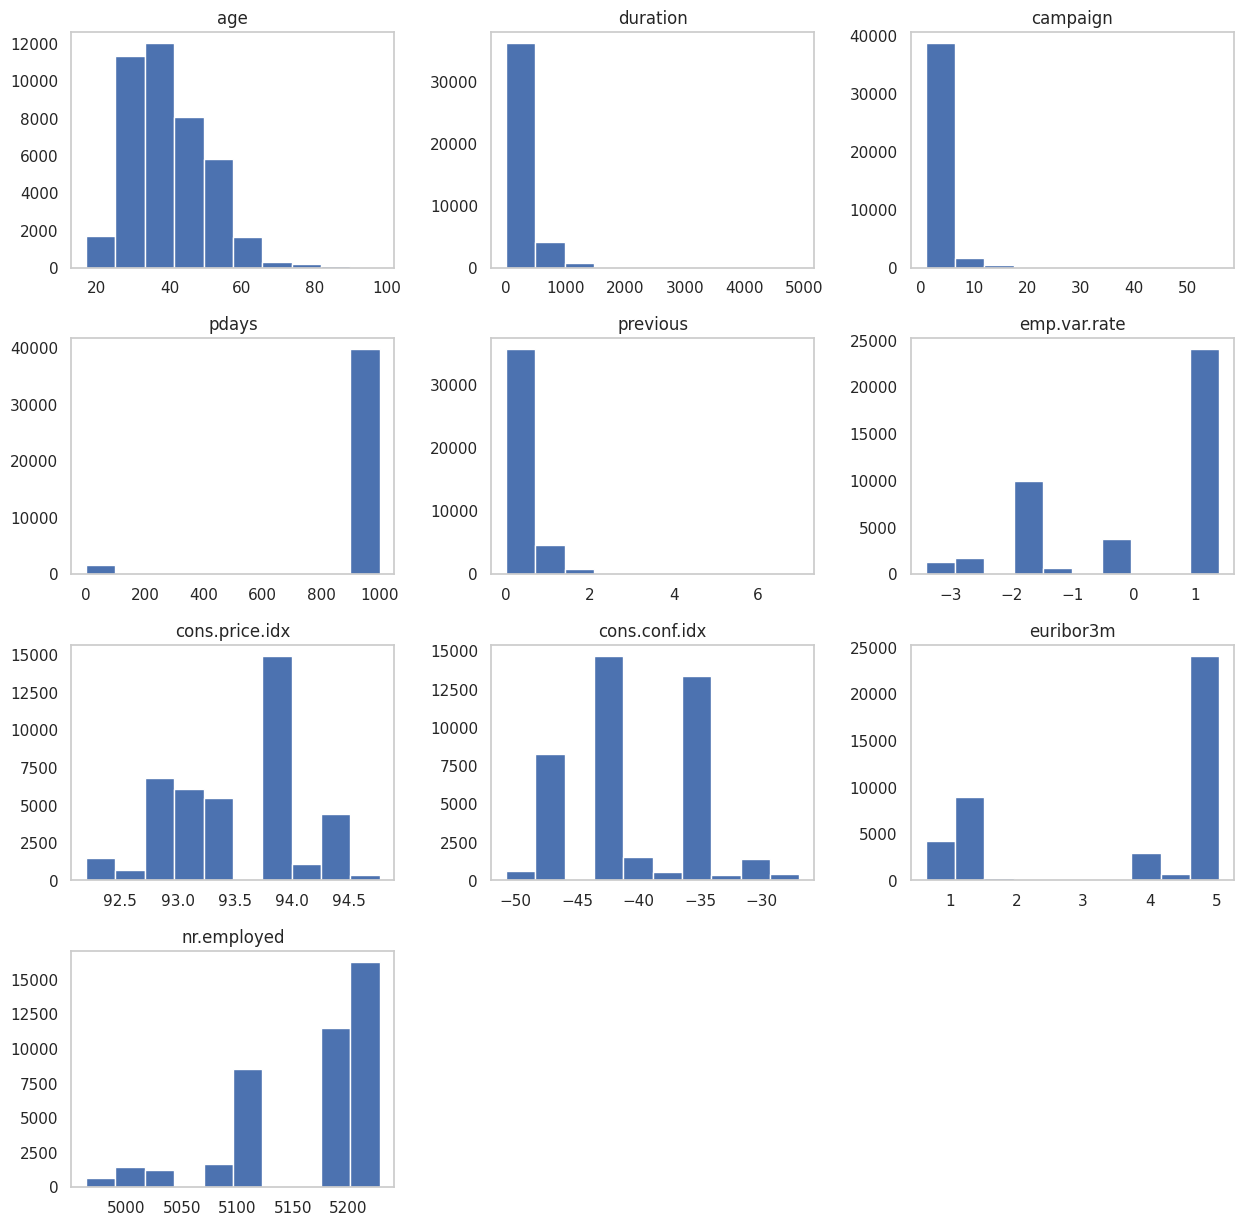

In [ ]:
df[num_col].hist(figsize=(15,15) , grid=False)
plt.title("Distribution of Numerical Features")
plt.show()

**Takeaways**

* Most call durations are extremely low, showing many customers disengage very quickly.

* Age is concentrated in the mid-range, with very few extreme ages appearing as outliers.

* Campaign and previous contacts have long right tails, indicating a small group of customers received unusually high numbers of contact attempts.

* Pdays shows a large spike at 999, which looks like an outlier but is actually meaningful (represents “never contacted before”).

* Economic indicators (euribor3m, cons.price.idx, nr.employed) form tight clusters, showing stable macroeconomic conditions with minimal outliers.

###*>>Outlier Detection (Boxplots)*

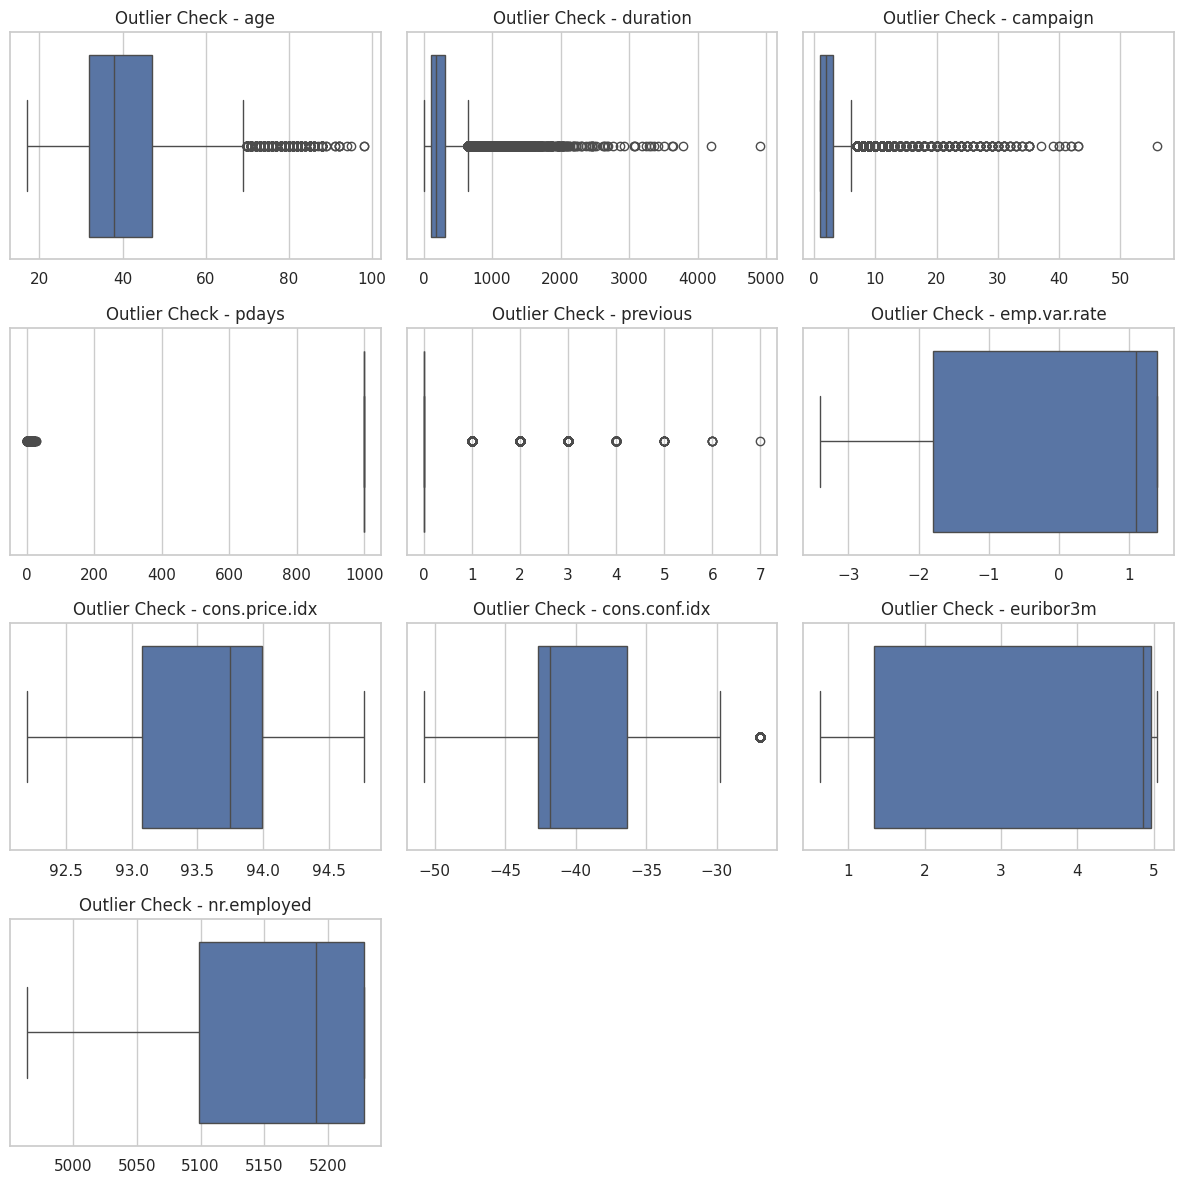

In [ ]:
# Calculate grid dimensions for a square layout
num_plots = len(num_col)
num_cols_grid = 3
num_rows_grid = math.ceil(num_plots / num_cols_grid)

plt.figure(figsize=(num_cols_grid * 4, num_rows_grid * 3))
for i, col in enumerate(num_col):
    plt.subplot(num_rows_grid, num_cols_grid, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Check - {col}")
    plt.xlabel("")
plt.tight_layout()
plt.show()

**Important Insights from Outlier Analysis**

* Age: Mostly centered around middle-aged customers; a few older ages appear as outliers but not extreme.

* Duration: Very high spread with many extreme long-duration outliers — calls vary widely; long calls are rare but impactful.

* Campaign: A few customers were contacted an unusually high number of times — potential oversaturation.

* Pdays: Strong spike at 999 (never contacted before). This is expected and not a true outlier.

* Previous: Only a small number of clients had multiple past contacts; values 4–7 act as outliers.

* Emp.var.rate: Mostly stable, slight deviation on the negative side.

* cons.price.idx: Very tight distribution, no meaningful outliers → stable economic environment.

* cons.conf.idx: One clear outlier on the higher end (less negative confidence).

* Euribor3m: No strong outliers; smooth range.

* nr.employed: Slight right-end outliers; overall stable employment numbers.

###*>>Numerical Features vs Target Variable (y)*

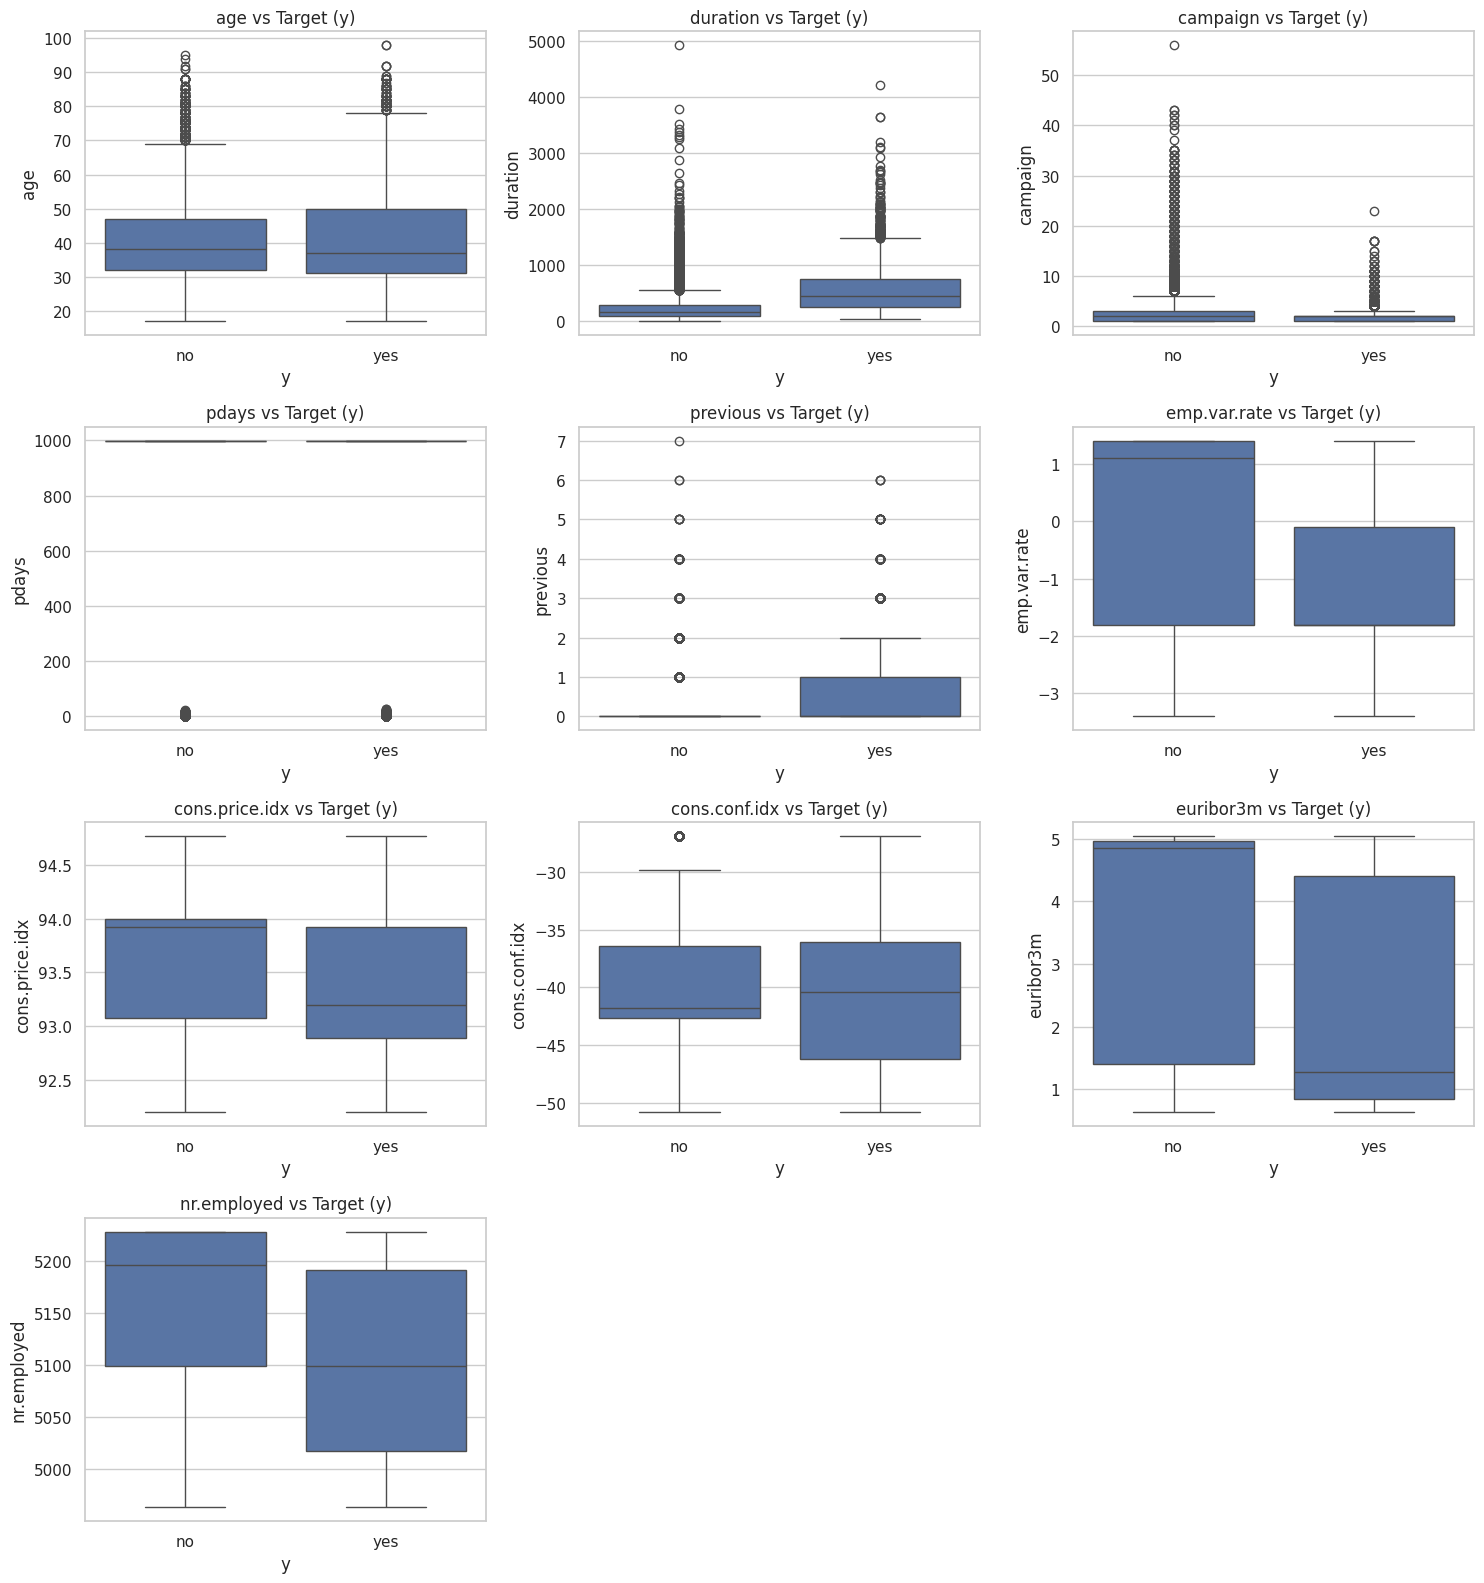

In [ ]:
# Calculate grid dimensions
num_plots = len(num_col)
num_cols_grid = 3
num_rows_grid = math.ceil(num_plots / num_cols_grid)

plt.figure(figsize=(num_cols_grid * 5, num_rows_grid * 4))
for i, col in enumerate(num_col):
    plt.subplot(num_rows_grid, num_cols_grid, i + 1)
    sns.boxplot(x='y', y=col, data=df,)
    plt.title(f"{col} vs Target (y)")
    plt.ylabel(col)
plt.tight_layout()
plt.show()

**Key points from Numerical Features vs Target Variable**

* Longer call duration → highest chance of subscription.

* Customers previously contacted or engaged convert more.

* Lower interest rates & weak economic conditions drive higher subscriptions.

* Slightly older customers show better response.

###*>>Correlation Between Numerical Features*

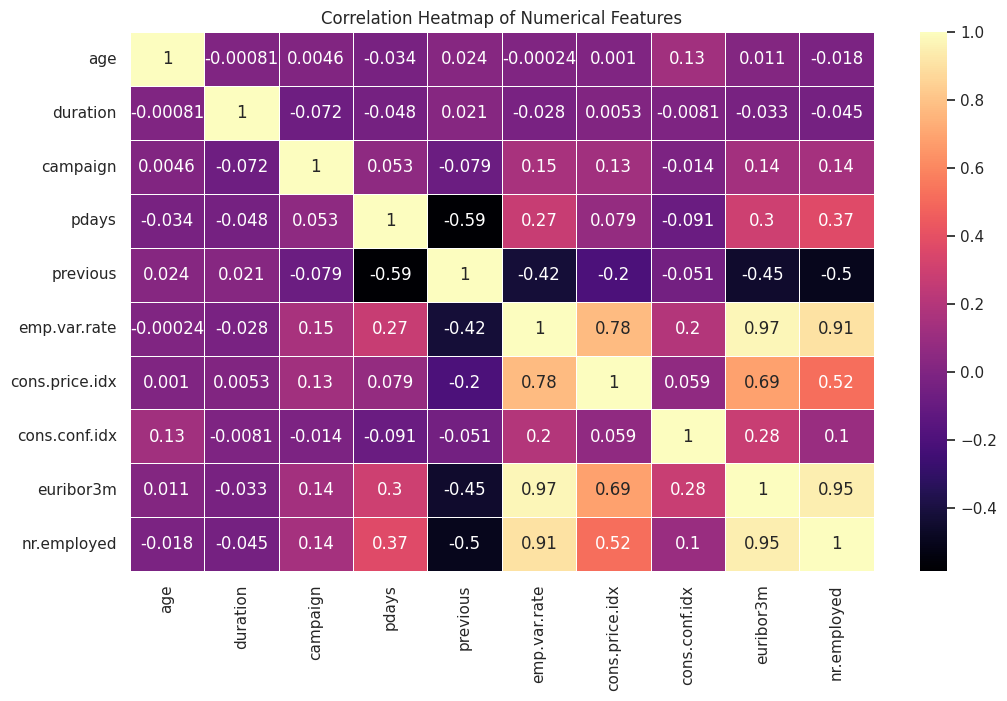

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df[num_col].corr(), annot=True, cmap='magma', linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


**Key Insights From Correlation :**

* Macro-economic features (emp.var.rate, euribor3m, nr.employed) show very strong correlations with each other → they capture the same trend.

* Duration has almost zero correlation with other features → it behaves independently (but should be removed for real-world modeling).

* pdays and previous have a strong negative correlation (-0.59) → more days since contact means fewer earlier contacts.

* Economic indicators have moderate relationships with pdays and previous → past campaigns were affected by economic conditions.

* Customer attributes (age, campaign, duration) show very low correlations with others → they contribute independent information



###Categorical Columns Analysis

###*>>Identify Categorical Columns*

In [ ]:
cat_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", cat_cols) ## These are all text-based columns


Categorical Columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


###*>>Distribution of Categorical Features*



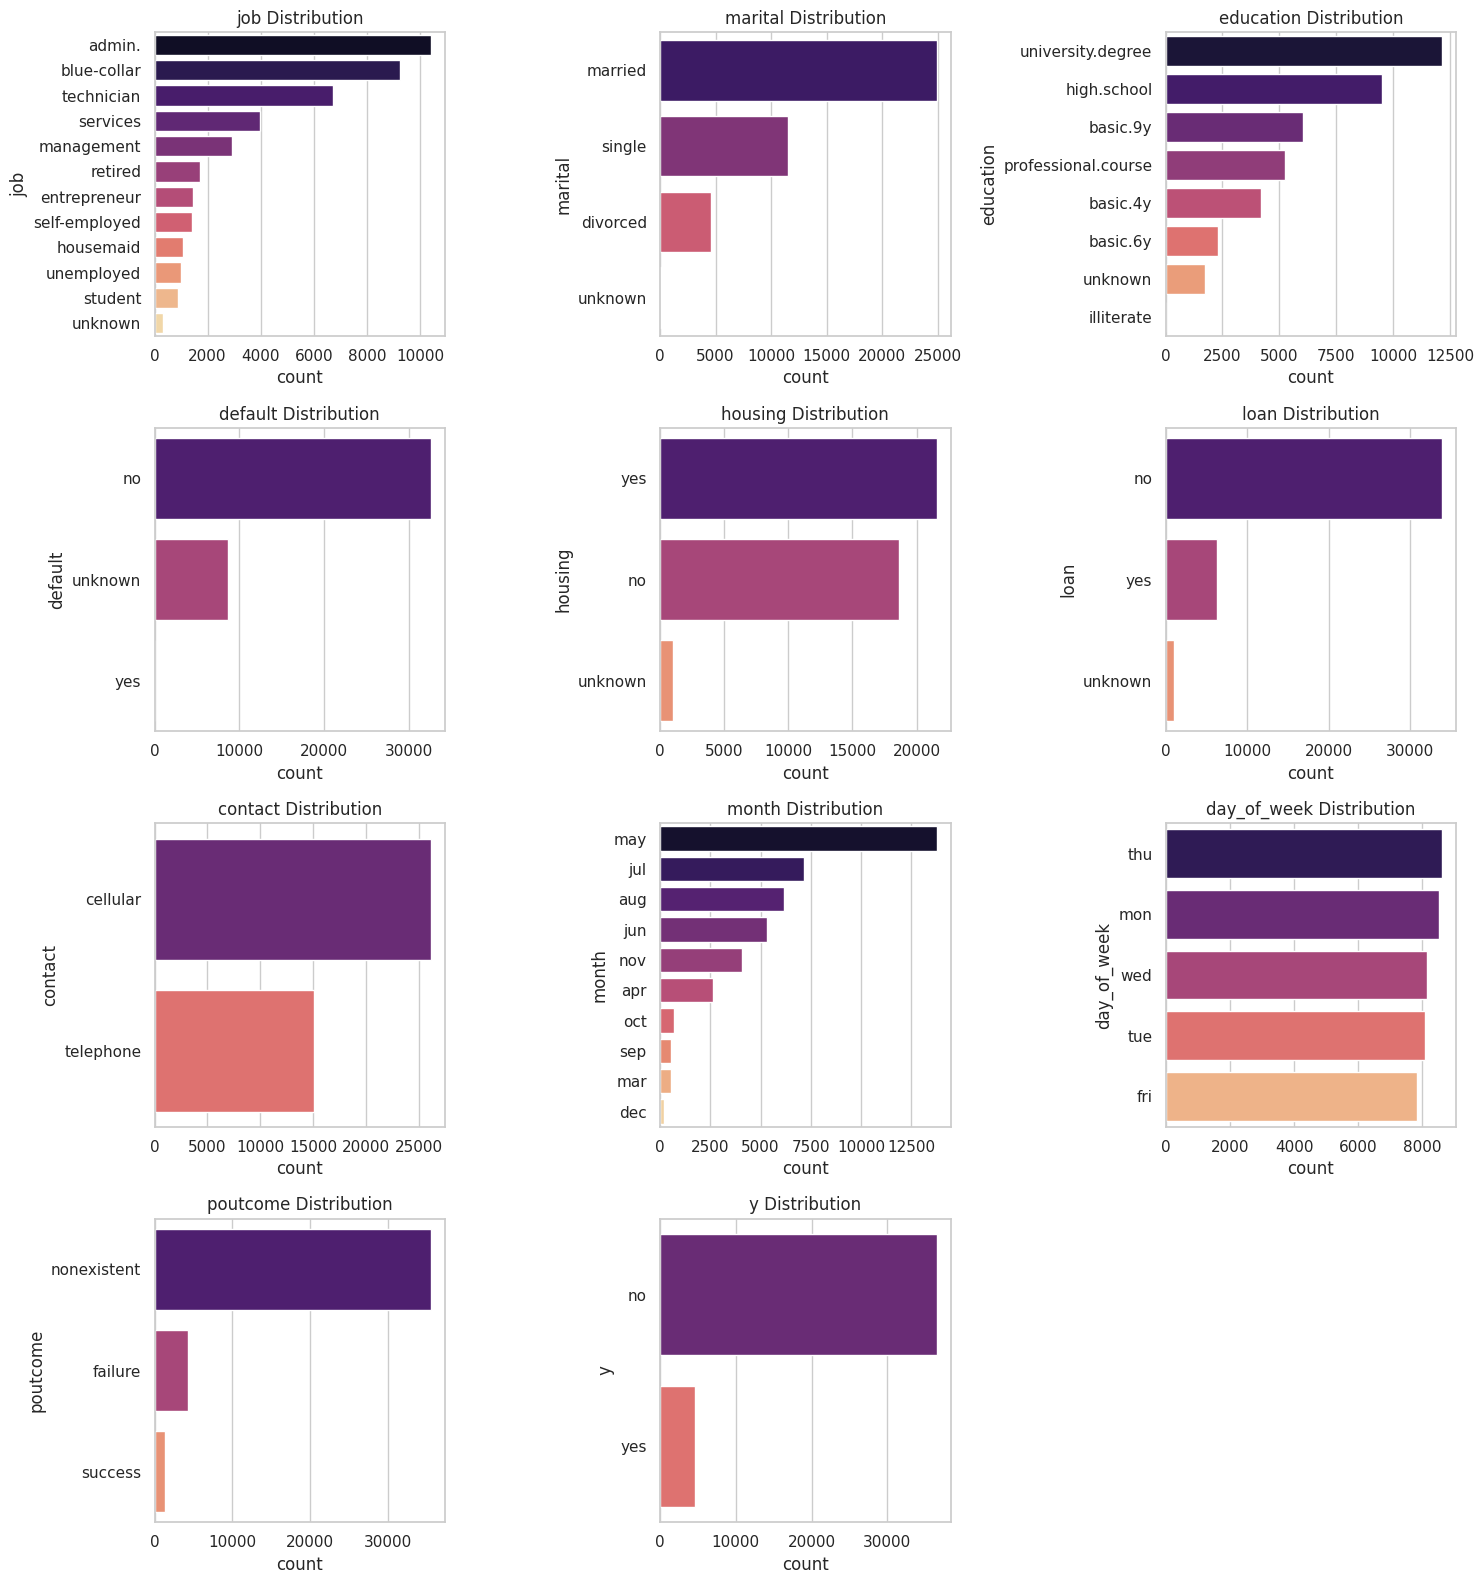

In [ ]:
# Calculate grid dimensions
num_plots = len(cat_cols)
num_cols_grid = 3
num_rows_grid = math.ceil(num_plots / num_cols_grid)

plt.figure(figsize=(num_cols_grid * 5, num_rows_grid * 4))
for i, col in enumerate(cat_cols):
    plt.subplot(num_rows_grid, num_cols_grid, i + 1)
    sns.countplot(y=col, data=df, order=df[col].value_counts().index, palette='magma')
    plt.title(f"{col} Distribution")
    plt.tight_layout()
plt.show()

**Takeaways**

* Jobs: Majority are admin, blue-collar, and technician — main target groups for marketing.

* Marital: Married customers dominate — more financially stable, good deposit prospects.

* Education: Most are high school or university graduates — aware and responsive to banking offers.

* Housing Loan: Many have housing loans — ideal for cross-selling term deposits.

* Personal Loan: Most don’t have personal loans — potential to invest in deposits.

* Contact Type: Cellular calls outperform landlines — focus on mobile-based marketing.

* Month: High calls in May–August — campaigns should be spread evenly year-round.

* Day of Week: Better engagement on Mon–Thu; avoid Fridays.

* Previous Outcome: Mostly no prior contact or failures — need better targeting and follow-up strategy.

###*>>Categorical Features vs Target Variable (y)*

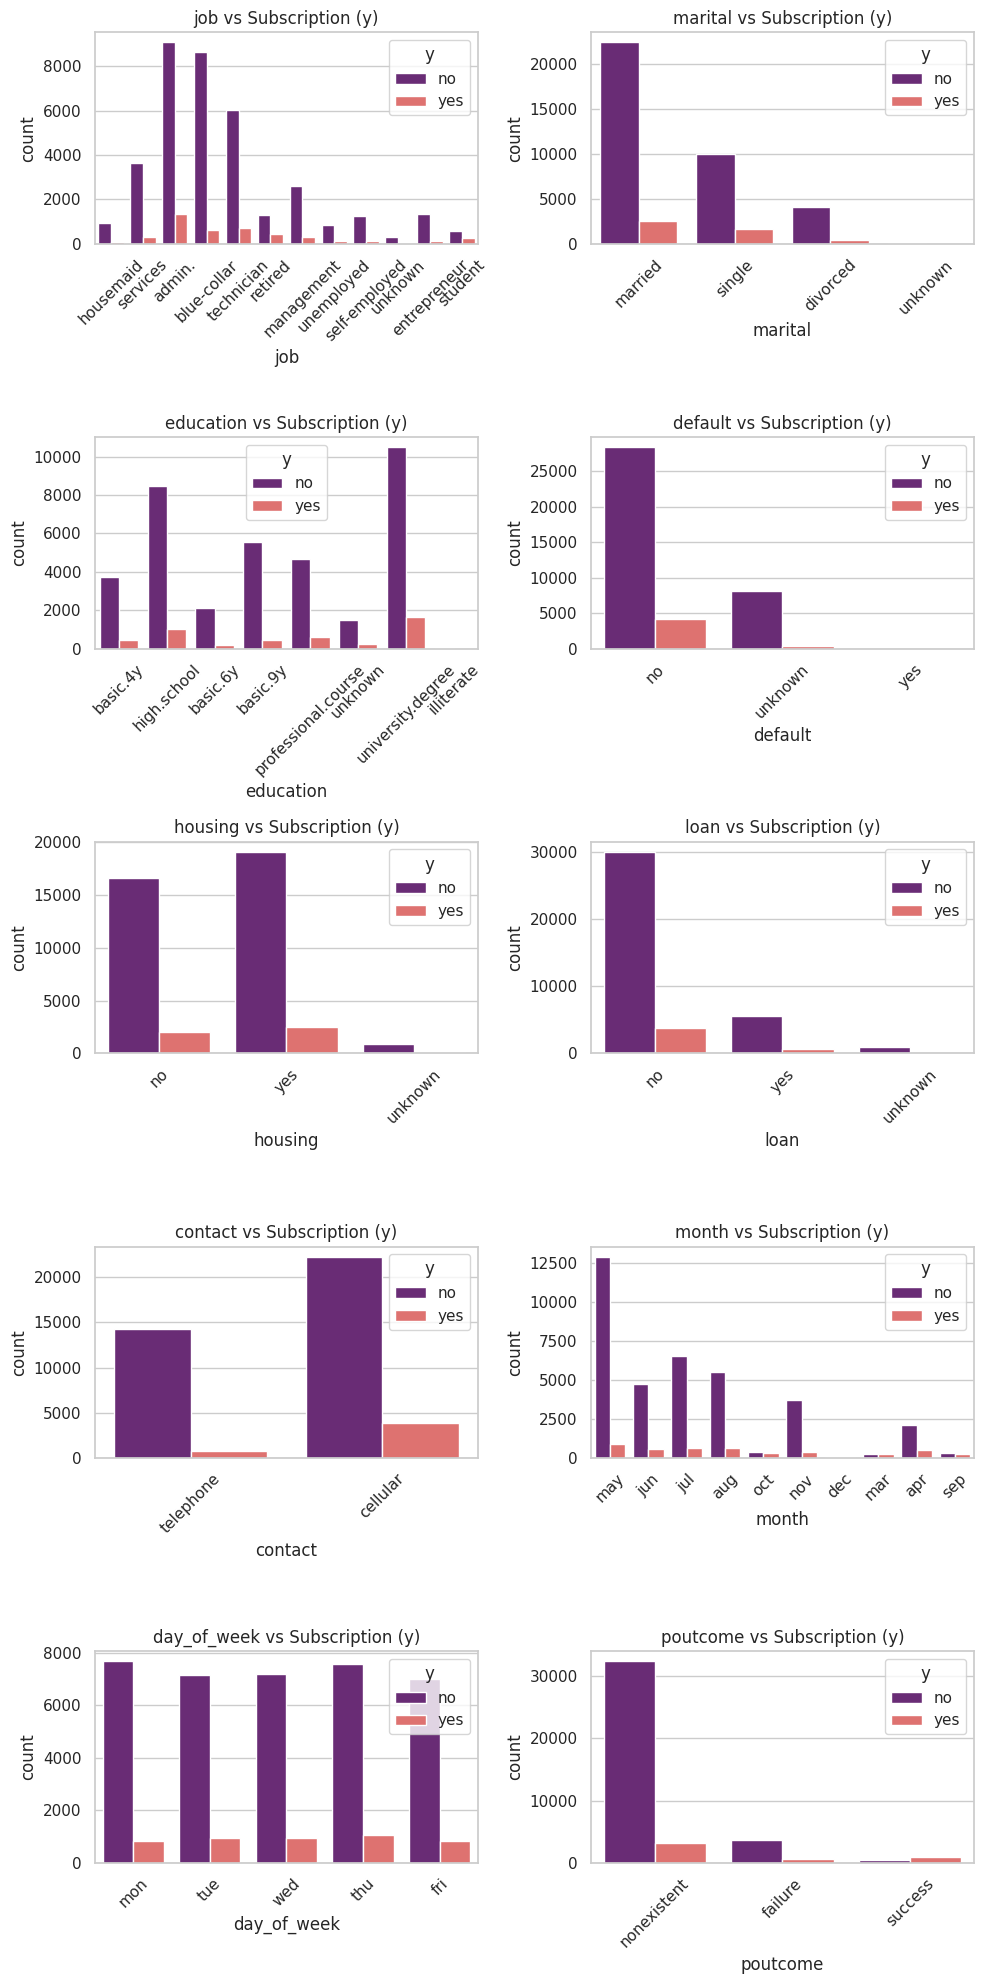

In [ ]:
categorical_features_to_plot =['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Calculate grid dimensions
num_plots = len(categorical_features_to_plot)
num_cols_grid = 2
num_rows_grid = math.ceil(num_plots / num_cols_grid)

plt.figure(figsize=(num_cols_grid * 5, num_rows_grid * 4))
for i, col in enumerate(categorical_features_to_plot):
    plt.subplot(num_rows_grid, num_cols_grid, i + 1)
    sns.countplot(x=col, hue='y', data=df, palette='magma')
    plt.title(f"{col} vs Subscription (y)")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

**Categorical Feature – Key Insights**

* admin , blue-collar , technition ,retired are more intrestred than other jobs holders.

* Married customers convert slightly better than single customers.

* Higher education levels (university, professional course) show better subscription response.

* Customers with credit default or personal loans rarely subscribe.

* Customers without a housing loan show slightly higher interest.

* Cellular contact performs much better than telephone.

* Best-performing months: May , june , july , august.


##Feature Relationship Analysis

* Feature relationships help us understand how **two or more features interact together**,  
and how they impact the target variable **y (subscribed or not)**.

* This goes beyond univariate plots and gives **deeper, business-focused insights**.

---
🎯 Goal
Understand which features affect the target.



Pairwise Relationships (Pairplot)

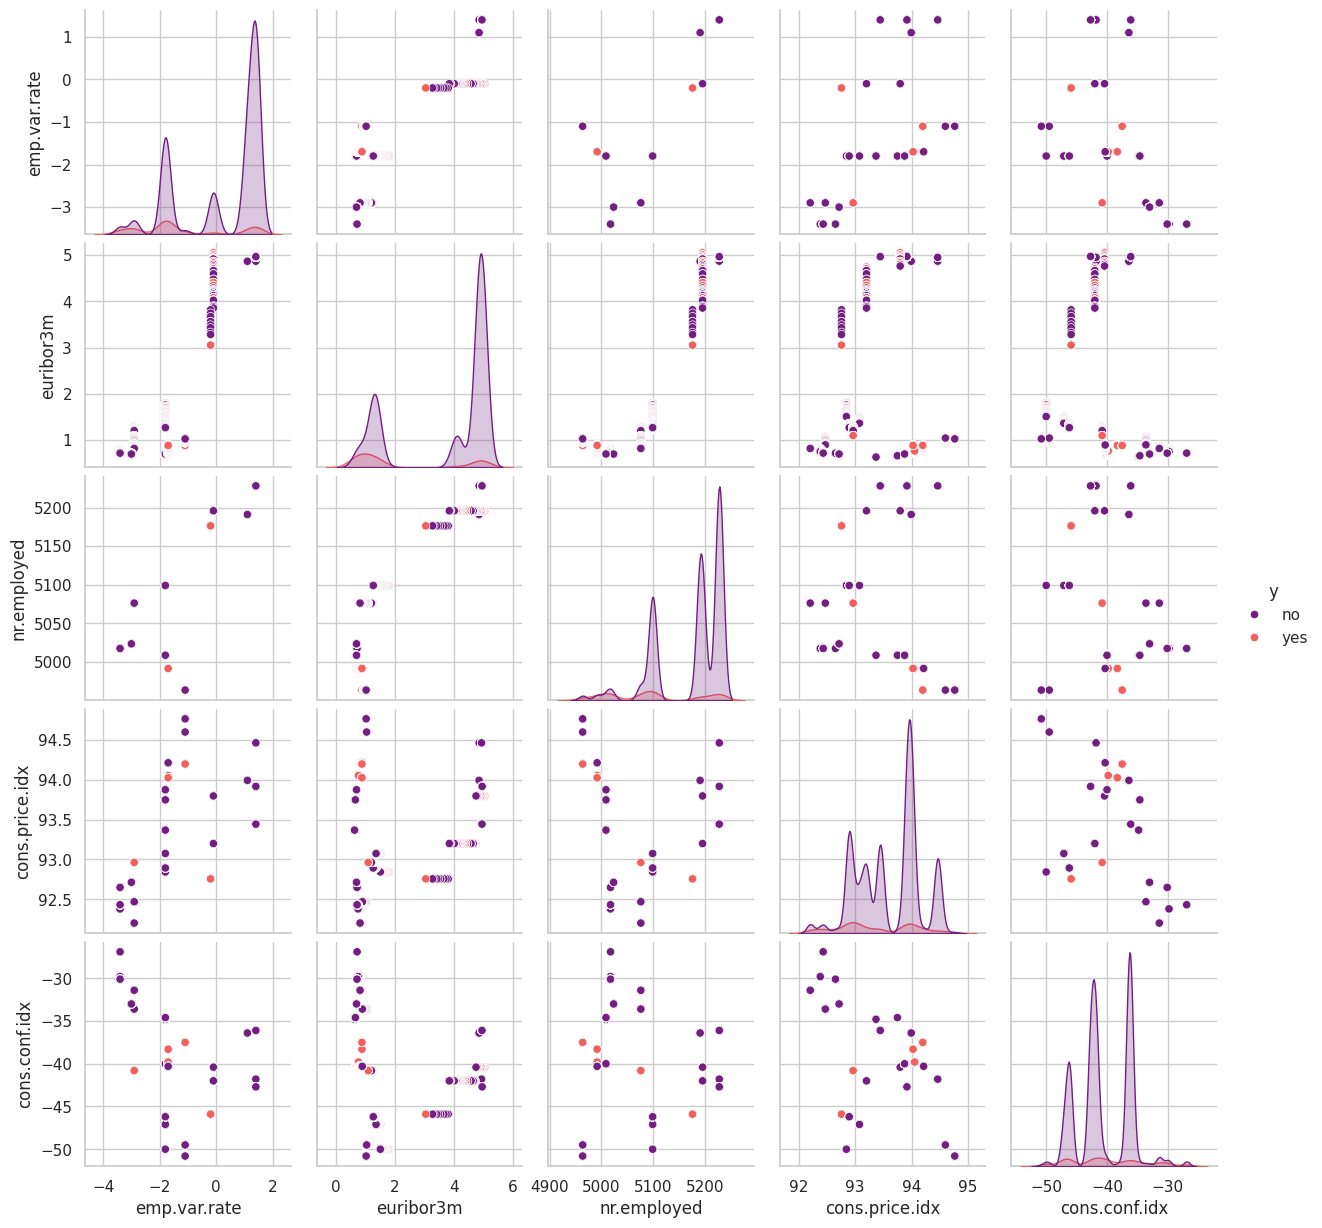

In [ ]:
sns.pairplot(df[['emp.var.rate',
    'euribor3m',
    'nr.employed',
    'cons.price.idx',
    'cons.conf.idx',
    'y']],hue='y', diag_kind='kde', palette='magma')
plt.show()

**Important Insights from the Pairplot**

* ***econ indicators cluster tightly***, showing “yes” responses mainly occur under very specific economic conditions.

* ***euribor3m stands out*** — lower interest rates consistently align with higher subscription likelihood.

* **emp.var.rate and nr.employed move together**, and “yes” points appear when both are in stable mid-range values.

* **cons.price.idx and cons.conf.idx show heavy overlap**, indicating weak separation between “yes” and “no”.

* **Overall distribution reveals class imbalance**, with “yes” cases forming small, distinct clusters while “no” dominates across all pairwise relationships.


##Multicollinearity Check (VIF)


###Variance_Inflation_Factor Analysis (VIF):
* Economic indicators (cons.price.idx, nr.employed, euribor3m, cons.conf.idx, emp.var.rate) show extremely high VIF values, confirming very strong multicollinearity. This is expected since these variables represent the same macroeconomic trend.

* For logistic regression, the redundant variables were removed to avoid unstable coefficients.
For tree-based models, all features were retained since multicollinearity does not negatively impact their performance.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Selecting only numeric features
X = df.select_dtypes(include=['int64','float64']).drop(columns=['duration'], errors='ignore')

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

vif_data


,Feature,VIF
0,age,16.047397
1,campaign,1.912548
2,pdays,44.339341
3,previous,2.000539
4,emp.var.rate,28.906241
5,cons.price.idx,22518.752217
6,cons.conf.idx,120.070947
7,euribor3m,226.210374
8,nr.employed,26716.309239


## Skewness Check

#**Step 3 – Feature Engineering**

In [ ]:
skew_values = df[num_col].skew().sort_values(ascending=False)
skew_values

,0
campaign,4.762044
previous,3.831396
duration,3.262808
age,0.784560
cons.conf.idx,0.302876
cons.price.idx,-0.230853
euribor3m,-0.709194
emp.var.rate,-0.724061
nr.employed,-1.044317
pdays,-4.921386


##Apply Log1p To Transform Skewed columns:

* campaign
* previous
* duration



In [ ]:
# Columns that need log transformation
log_cols = ["duration", "campaign", "previous"]

# Apply log1p (log(1+x)) to avoid issues with zero values
for col in log_cols:
    df[col + "_log"] = np.log1p(df[col])

# View transformed columns
df[[c + "_log" for c in log_cols]].head()


,duration_log,campaign_log,previous_log
0,5.568345,0.693147,0.0
1,5.010635,0.693147,0.0
2,5.424950,0.693147,0.0
3,5.023881,0.693147,0.0
4,5.730100,0.693147,0.0


In [ ]:
pd.set_option('display.max_columns', None)
df.head() # Added three new columns (duration_log ,campaign_log,previous_log)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duration_log,campaign_log,previous_log
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.568345,0.693147,0.0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.010635,0.693147,0.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.424950,0.693147,0.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.023881,0.693147,0.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,5.730100,0.693147,0.0


##Standardizing Unknown Values in Categorical Features

Treating “unknown” Values as a Separate Category

Several categorical features contain the label “unknown,” which indicates missing or unavailable information. Instead of dropping these records or imputing values, we keep “unknown” as its own category. This allows the model to learn any patterns linked to missing information and ensures no data is lost during preprocessing.

In [ ]:
# Columns that contain unknown values
cols_with_unknown = ['job', 'marital', 'education', 'default', 'housing', 'loan']

# Replace "unknown" with "Unknown"
for col in cols_with_unknown:
    df[col] = df[col].replace('unknown', 'Unknown')

#**Step 4 –  Preprocessing**

*   Preprocessing is the step where we **clean and prepare the raw data** before giving it to a machine-learning model.  
In this step, we fix issues in the data by removing unwanted columns, filling missing or “unknown” values, converting text into numbers, and scaling the numerical features.

* This makes the dataset clean, consistent, and easy for the model to understand, so it can learn patterns correctly and give accurate predictions.


## Cleaning Features: Dropping Duration for Realistic Modeling
  The duration feature represents the length of the last phone call with the customer. This value is only known after the call has already happened. In real-life prediction, the bank wants to know before making the call whether a customer will subscribe to a term deposit.

In [ ]:
df = df.drop(columns=['duration','duration_log'], errors='ignore')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'campaign_log', 'previous_log'],
      dtype='object')

In [ ]:
# Drop the original 'campaign' and 'previous' columns as their log-transformed versions are already created
df = df.drop(columns=['campaign', 'previous'], errors='ignore')

print("Columns after dropping 'campaign' and 'previous':")
print(df.columns)

Columns after dropping 'campaign' and 'previous':
Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'pdays', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y',
       'campaign_log', 'previous_log'],
      dtype='object')


**why we dropped these columns:**
* We previously applied a log1p transformation to 'campaign' and 'previous' to handle their right-skewness.
* The transformed columns, 'campaign_log' and 'previous_log', are now part of our DataFrame.
* Retaining both the original and log-transformed versions of these features can lead to:
  1. Redundancy: They convey very similar information, potentially making the model less efficient.
  2. Multicollinearity: Highly correlated features can destabilize some models (e.g., linear models) and make feature importance harder to interpret.
* By dropping the original skewed columns and keeping the log-transformed ones, we provide the model with features that are often more suitable for learning, reducing the impact of extreme values and improving model robustness.

## Categorical Feature Encoding

Most machine learning algorithms cannot directly work with categorical data. We need to convert these features into a numerical format. One-hot encoding is a common technique for this, where each category value is converted into a new column and assigned a 1 or 0 (true/false) value.

In [ ]:
# Identify categorical columns to be encoded (excluding the target variable 'y')
categorical_features_for_encoding = [col for col in df.select_dtypes(include='object').columns if col != 'y']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_features_for_encoding, drop_first=False)

# Display the first few rows of the encoded DataFrame and its shape
print("Shape after one-hot encoding:", df_encoded.shape)
display(df_encoded.head())

Shape after one-hot encoding: (41176, 63)


,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign_log,previous_log,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_Unknown,marital_divorced,marital_married,marital_single,education_Unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_Unknown,default_no,default_yes,housing_Unknown,housing_no,housing_yes,loan_Unknown,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,999,1.1,93.994,-36.4,4.857,5191.0,no,0.693147,0.0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,57,999,1.1,93.994,-36.4,4.857,5191.0,no,0.693147,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,37,999,1.1,93.994,-36.4,4.857,5191.0,no,0.693147,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,40,999,1.1,93.994,-36.4,4.857,5191.0,no,0.693147,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,56,999,1.1,93.994,-36.4,4.857,5191.0,no,0.693147,0.0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
df_encoded.columns

Index(['age', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'campaign_log', 'previous_log',
       'job_Unknown', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'marital_Unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_Unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'default_Unknown', 'default_no',
       'default_yes', 'housing_Unknown', 'housing_no', 'housing_yes',
       'loan_Unknown', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'month_apr', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_o

##Scaling / Standardizing Numerical Features

Scaling makes all numbers equal and fair for the model by converting them to how far they are from average.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only numerical columns
num_cols = df_encoded.select_dtypes(include=['int64','float64']).columns

# Scale them
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()


,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign_log,previous_log,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_Unknown,marital_divorced,marital_married,marital_single,education_Unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_Unknown,default_no,default_yes,housing_Unknown,housing_no,housing_yes,loan_Unknown,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533143,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,1.629107,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,-0.290177,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,-0.002284,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,1.533143,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


In [ ]:
pd.set_option('display.max_columns', None)
df_encoded.head()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,campaign_log,previous_log,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_Unknown,marital_divorced,marital_married,marital_single,education_Unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_Unknown,default_no,default_yes,housing_Unknown,housing_no,housing_yes,loan_Unknown,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,1.533143,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
1,1.629107,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
2,-0.290177,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
3,-0.002284,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False
4,1.533143,0.195443,0.648101,0.722628,0.886568,0.712463,0.331695,no,-0.866684,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False


**Why One-Hot Encoded Are Not Scaled True/False Columns**

Boolean columns (True/False) created through One-Hot Encoding represent categorical membership using binary flags. Python stores these as boolean dtype, but machine learning models internally treat them as numeric (True = 1, False = 0).

Scaling these columns is unnecessary and harmful because:
- They already represent exact categorical information.
- Scaling would distort meaning (1 and 0 turning into arbitrary decimal values).
- Algorithms correctly interpret 0/1 binary indicators without scaling.

Therefore, only continuous numerical features are standardized, while binary one-hot columns remain unchanged.


##Train–Test Split

**This is the step where we divide the dataset into:**

*   Training data (80%) → model learns

*   Testing data (20%) → model is evaluated

In [ ]:
from sklearn.model_selection import train_test_split

# Convert 'y' column to numerical (0 for 'no', 1 for 'yes')
df_encoded['y'] = df_encoded['y'].map({'no': 0, 'yes': 1})

# Define X and y
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into train & test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,       # 20% test data
    random_state=42,     # reproducibility
    stratify=y           # keeps yes/no ratio same
)

print("Training Data Shape :", X_train.shape)
print("Testing Data Shape  :", X_test.shape)
print("Training Target Dist:\n", y_train.value_counts(normalize=True))
print("Testing Target Dist :\n", y_test.value_counts(normalize=True))


Training Data Shape : (32940, 62)
Testing Data Shape  : (8236, 62)
Training Target Dist:
 y
0    0.887341
1    0.112659
Name: proportion, dtype: float64
Testing Target Dist :
 y
0    0.887324
1    0.112676
Name: proportion, dtype: float64


##SMOTE(Synthetic Minority Oversampling Technique)





**Why SMOTE Is Applied**

The target variable is highly imbalanced (only ~11% “yes”).  
Training a model on this distribution would heavily bias predictions toward “no”.  

To resolve this, we apply SMOTE (Synthetic Minority Oversampling Technique), which generates synthetic samples for the minority class, balancing the training data.


In [ ]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
sm = SMOTE(random_state=42)

# Apply only to training data
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("\nAfter SMOTE:", y_train_resampled.value_counts())


Before SMOTE: y
0    29229
1     3711
Name: count, dtype: int64

After SMOTE: y
0    29229
1    29229
Name: count, dtype: int64


In [ ]:
X_train_resampled.head()

,age,pdays,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign_log,previous_log,job_Unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_Unknown,marital_divorced,marital_married,marital_single,education_Unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_Unknown,default_no,default_yes,housing_Unknown,housing_no,housing_yes,loan_Unknown,loan_no,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,-1.537711,0.195443,-1.898269,-1.058545,-0.064207,-1.360281,-1.257222,-0.041602,2.067414,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,True,False,False
1,-0.769998,0.195443,0.648101,0.722628,0.886568,0.711310,0.331695,-0.866684,-0.381474,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False
2,-0.674033,0.195443,-0.115810,-0.649100,-0.323509,0.359606,0.398131,-0.866684,-0.381474,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False
3,-0.194212,0.195443,0.839079,0.591329,-0.474769,0.770119,0.845186,0.997877,-0.381474,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False
4,-0.098248,0.195443,0.839079,0.591329,-0.474769,0.772425,0.845186,0.997877,-0.381474,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False


#**Step 5 – Model Building**

*   **When we use Raw data (no SMOTE):**

          It gets well accuracy But that accuracy is FAKE because the model predicts mostly NO.

*   **When we use data After preprocessing + SMOTE**

           It gets perfect accuracy (Ex: 75-88 %) usually

##LOGISTIC REGRESSION
*    It looks at the data and calculates the probability of something happening.





In [ ]:
# Create a SEPARATE COPY ONLY for Logistic Regression
cols_to_remove = ['emp.var.rate', 'nr.employed']

# Logistic Regression dataset
X_train_lr = X_train_resampled.drop(cols_to_remove, axis=1)
X_test_lr  = X_test.drop(cols_to_remove, axis=1)


**Takeaway :** we create Separate Copy only for Logistic Regression
because, it gets confused if we give it some columns (because they are too similar)

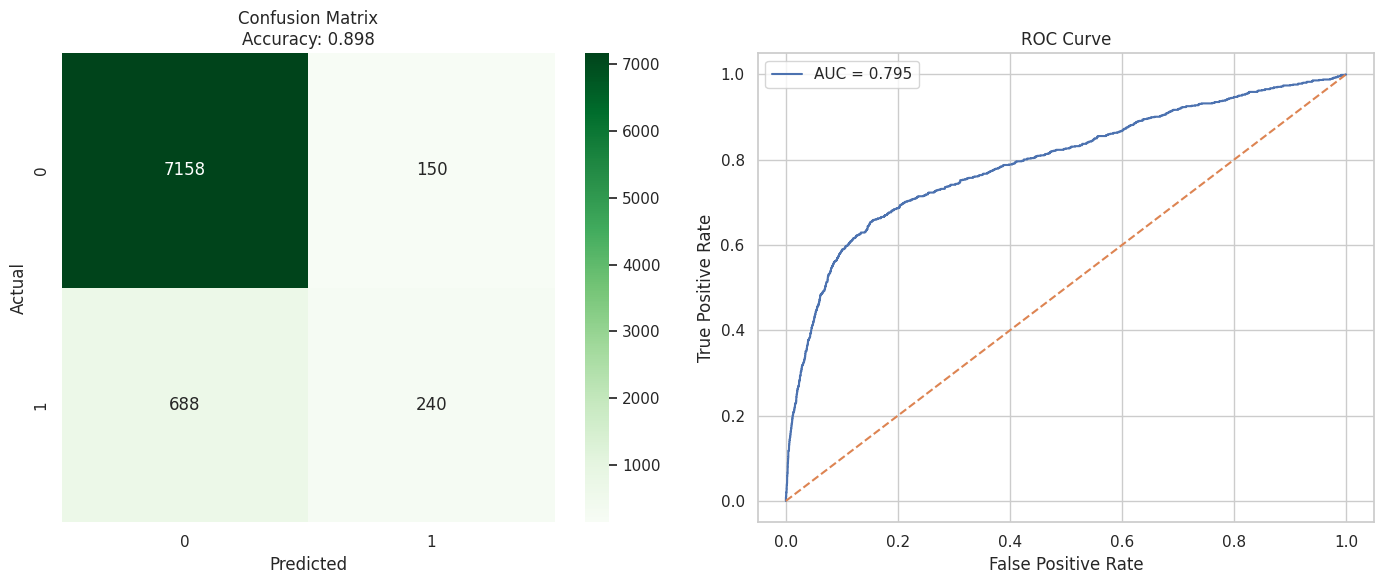


Classification Report:

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7308
           1       0.62      0.26      0.36       928

    accuracy                           0.90      8236
   macro avg       0.76      0.62      0.65      8236
weighted avg       0.88      0.90      0.88      8236

ROC-AUC Score: 0.795


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Train Model
log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_lr, y_train_resampled)

# Predictions
y_pred = log_reg.predict(X_test_lr)
y_pred_proba = log_reg.predict_proba(X_test_lr)[:, 1]

# Metrics
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# --- PLOT Everything ---
plt.figure(figsize=(14, 6))

# Confusion Matrix
plt.subplot(1, 2, 1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title(f"Confusion Matrix\nAccuracy: {acc:.3f}")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# ROC Curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, label=f"AUC = {auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

plt.tight_layout()
plt.show()

# --- PRINT Classification Report ---
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {auc:.3f}")


**Takeaway :** After removing the columns emp.var.rate and nr.employed and creating a separate dataset for Logistic Regression, the model still produced the same results. This means these columns were not influencing the predictions much. The real issue is not the features, but the class imbalance and the limitations of Logistic Regression. So, even if we remove some columns, the model will still struggle to correctly predict the “YES” customers.

###**Conclusion for Logistic Regression (Confusion Matrix)**

The Logistic Regression model achieved an accuracy of 89.8%, which looks high because the model predicts the majority class (“No”) very well. It correctly identified 7158 customers who would not subscribe. However, the model struggled to detect the “Yes” customers: out of 928 actual “Yes” cases, it predicted only 240 correctly, while 688 were missed and classified as “No.” This means the model has poor recall for the positive class.

***The high accuracy is mainly due to class imbalance, and the model is not reliable for identifying customers who are likely to subscribe.***

##DECISION TREE
*   A Decision Tree works like asking questions step-by-step to make a decision.
It keeps splitting the data based on the best question until it reaches an answer

Accuracy: 0.8413064594463332

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      7308
           1       0.32      0.36      0.34       928

    accuracy                           0.84      8236
   macro avg       0.62      0.63      0.62      8236
weighted avg       0.85      0.84      0.85      8236



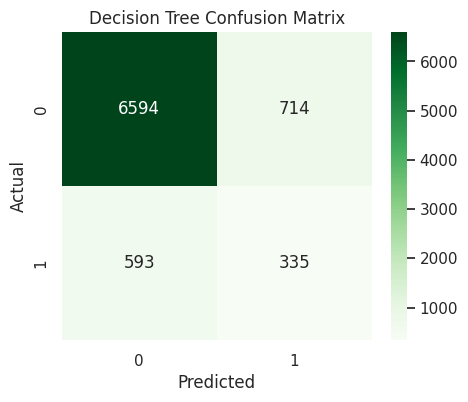

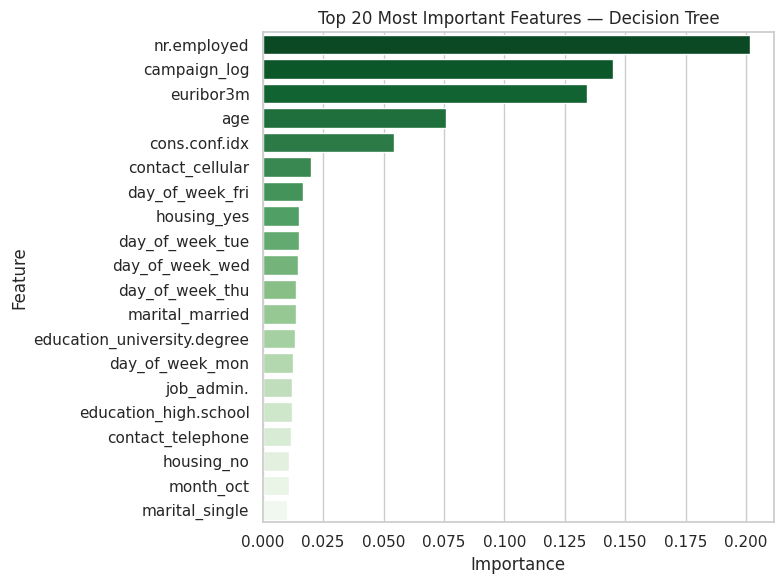

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


# Train Decision Tree Model

dt = DecisionTreeClassifier(
    criterion='gini',     # impurity measure
    max_depth=None,       # None = full depth
    random_state=42
)

# If you used SMOTE:
dt.fit(X_train_resampled, y_train_resampled)

#  Predictions
y_pred_dt = dt.predict(X_test)

#  Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt)



#  Confusion Matrix Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, cmap="Greens", fmt='g')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#  Feature Importance Plot
importances = dt.feature_importances_
feat_names = X_train_resampled.columns

# Create importance dataframe
imp_df = pd.DataFrame({
    'Feature': feat_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(20)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=imp_df,palette=sns.color_palette("Greens_r", len(imp_df)))
plt.title("Top 20 Most Important Features — Decision Tree")
plt.tight_layout()
plt.show()


**WHY ROC-AUC = NaN for Decision Tree**

*Because ROC-AUC needs probabilities, not classes*

###**Conclusion for Decision Tree (Confusion Matrix)**

The Decision Tree model achieved good overall accuracy (84%), mainly because it predicts the “No” class very well. However, it struggles to correctly identify customers who will subscribe to the term deposit, with low recall for the “Yes” class. This means the model misses many actual subscribers, which reduces its usefulness for marketing decisions. Although Decision Trees are easy to interpret and show key features like nr.employed, campaign_log, and euribor3m, they are not the best choice for this dataset.

##RANDOM FOREST CLASSIFIER
*   Random Forest makes a stronger prediction by combining the decisions of many decision trees and taking the majority vote

Random Forest Accuracy: 0.8862311801845556

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      7308
           1       0.49      0.38      0.43       928

    accuracy                           0.89      8236
   macro avg       0.71      0.66      0.68      8236
weighted avg       0.88      0.89      0.88      8236



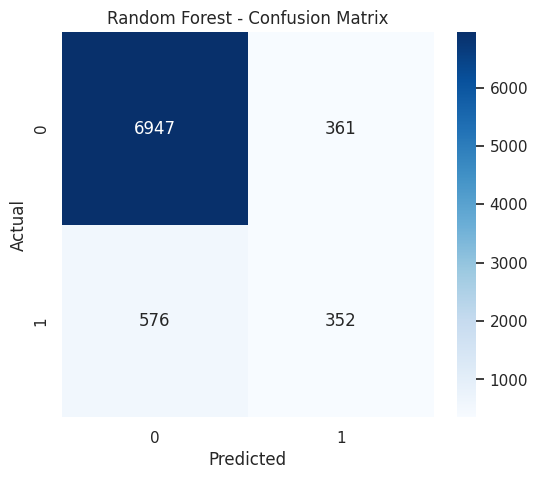

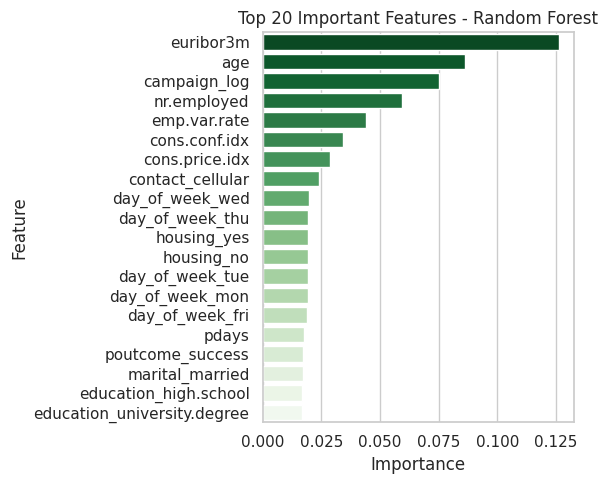

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


# Train Random Forest Model
rf = RandomForestClassifier(
    n_estimators=300,     # number of trees
    max_depth=None,      # allow trees to grow fully
    random_state=42,
    n_jobs=-1            # use all CPU cores
)

# Use SMOTE data
rf.fit(X_train_resampled, y_train_resampled)


# Predictions
y_pred_rf = rf.predict(X_test)


# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

cm = confusion_matrix(y_test, y_pred_rf)

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Feature Importance (Top 20)
importances = rf.feature_importances_
features = X_train_resampled.columns

# Create a DataFrame for feature importance
feat_imp = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values(by="Importance", ascending=False)
    .head(20)
)

plt.figure(figsize=(6,5))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="Greens_r")
plt.title("Top 20 Important Features - Random Forest")
plt.tight_layout()
plt.show()


###**Random Forest – Conclusion**
The Random Forest model achieved strong overall performance with an accuracy of 88.62%, showing that it is highly effective at predicting customers who will not subscribe (class 0), with excellent precision (0.92) and recall (0.95). However, like most models applied to this imbalanced dataset, predicting the minority class (class 1 – subscribers) remains challenging. The model achieved a recall of 0.38 and an F1-score of 0.43 for subscribers, meaning it correctly identifies some positive cases but still misses many who may actually subscribe. Despite this limitation, Random Forest clearly outperforms simpler models like Logistic Regression and Decision Tree, thanks to its ability to capture complex relationships using multiple decision trees. Overall, Random Forest is a reliable and stable model with strong performance, especially for classifying non-subscribers

##XGBoost Model
*  XGBoost Finds hidden patterns in data makes many smart decision trees, learns from their mistakes, and combines them to make the best final prediction

XGBoost Accuracy: 0.8969159786304031

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94      7308
           1       0.56      0.38      0.45       928

    accuracy                           0.90      8236
   macro avg       0.74      0.67      0.70      8236
weighted avg       0.88      0.90      0.89      8236



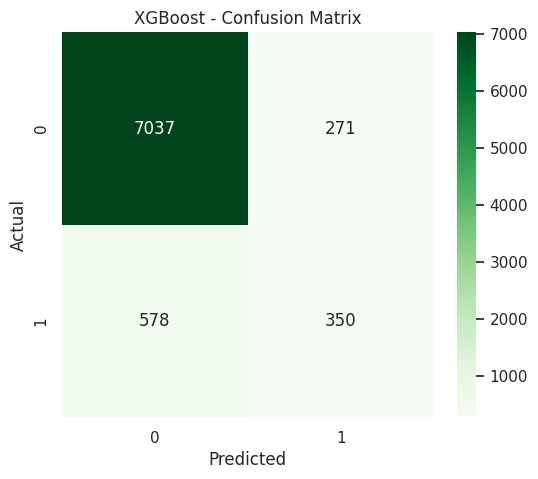

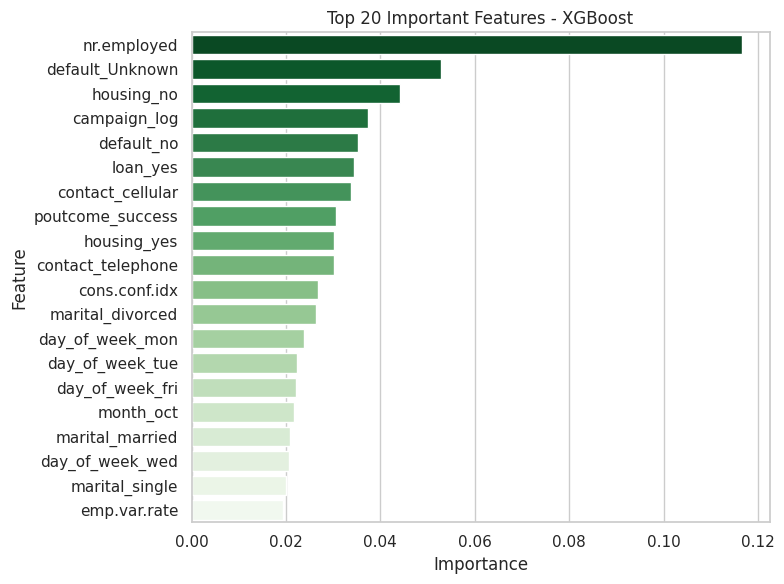

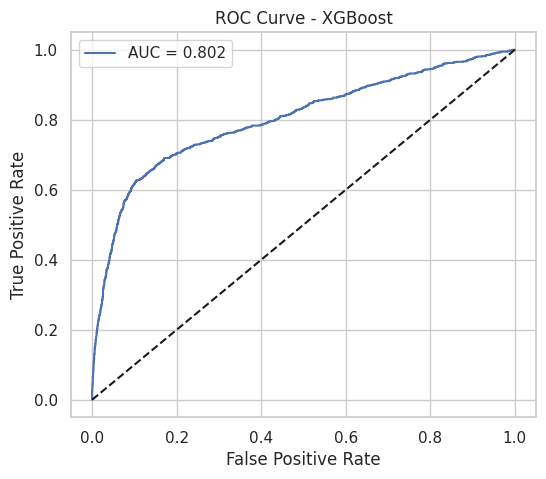

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Train the XGBoost Model

xgb = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Use SMOTE-balanced training
xgb.fit(X_train_resampled, y_train_resampled)


# 2. Predictions

y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]


# 3. Evaluation

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

cm = confusion_matrix(y_test, y_pred_xgb)


# 4. Confusion Matrix Heatmap

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="g", cmap="Greens")
plt.title("XGBoost - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# 5. Feature Importance Plot (Top 20)

importances = xgb.feature_importances_
features = X_train_resampled.columns

feat_imp = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values(by="Importance", ascending=False)
    .head(20)
)

plt.figure(figsize=(8, 6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="Greens_r")
plt.title("Top 20 Important Features - XGBoost")
plt.tight_layout()
plt.show()


# 6. ROC Curve

fpr, tpr, _ = roc_curve(y_test, y_proba_xgb)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_xgb):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - XGBoost")
plt.legend()
plt.show()


###**XGBoost – Final Conclusion**
The XGBoost model achieved strong overall performance with an accuracy of 89.69%, showing that it is highly effective at predicting customers who will not subscribe (class 0), with excellent precision and recall. For the subscriber class (class 1), XGBoost achieved a precision of 0.56 and a recall of 0.38, which is better than simpler models like Logistic Regression and Decision Tree, and similar to Random Forest and LightGBM. Although identifying potential subscribers remains challenging due to the natural imbalance in the dataset, XGBoost still offers a solid balance of accuracy, stability, and feature-learning ability. Its ability to model complex patterns makes it one of the most reliable models for this classification task. Overall, XGBoost stands out as a strong and competitive model, performing consistently close to the best results obtained in this project.

##LIGHT GBM
* LightGBM makes many small decision trees very fast, learns from mistakes, and combines them to make a smart final prediction.

[LightGBM] [Info] Number of positive: 29229, number of negative: 29229
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.056276 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1990
[LightGBM] [Info] Number of data points in the train set: 58458, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Tuned LightGBM Accuracy: 0.9005585235551239

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      7308
           1       0.61      0.34      0.43       928

    accuracy                           0.90      8236
   macro avg       0.76      0.65      0.69      8236
weighted avg       0.88      0.90      0.89      8236



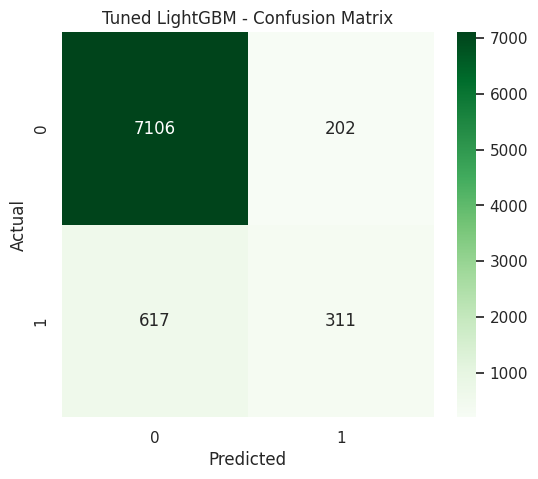

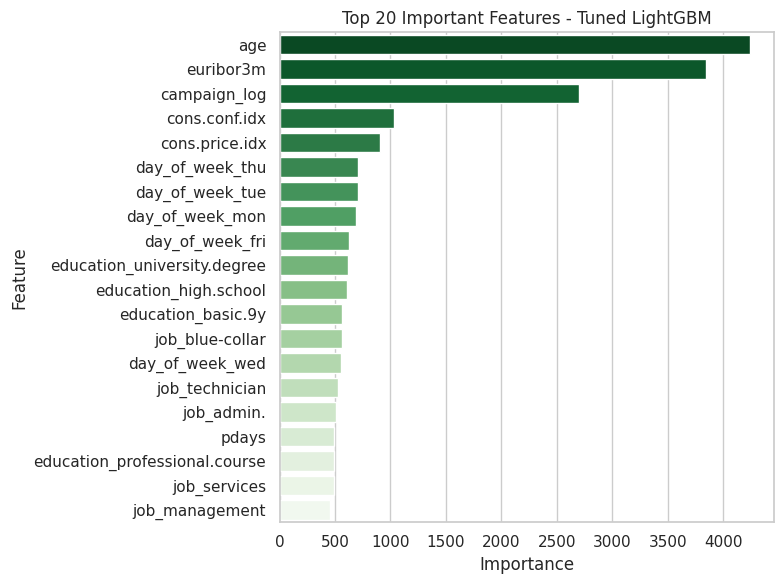

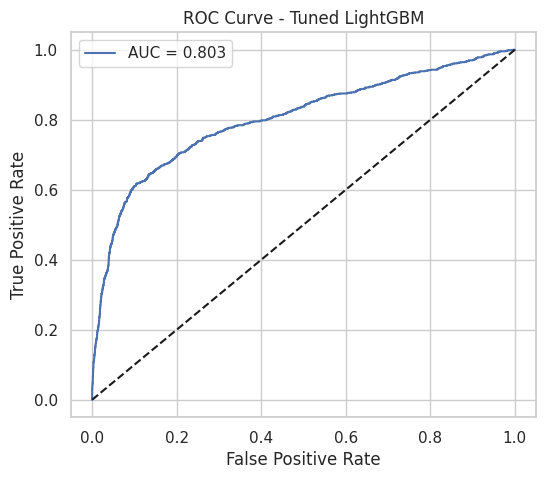

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Tuned LightGBM Model
lgb_tuned = LGBMClassifier(
    n_estimators=500,          # more trees = better learning
    learning_rate=0.03,        # smaller learning rate = stable
    max_depth=-1,              # unlimited depth
    num_leaves=63,             # more leaves = more complex patterns
    subsample=0.9,             # row sampling
    colsample_bytree=0.9,      # feature sampling
    reg_alpha=0.1,             # L1 regularization
    reg_lambda=0.1,            # L2 regularization
    min_child_samples=20,      # prevents overfitting
    random_state=42
)

# Fit on SMOTE resampled data
lgb_tuned.fit(X_train_resampled, y_train_resampled)

# Predictions
y_pred_lgb_tuned = lgb_tuned.predict(X_test)
y_proba_lgb_tuned = lgb_tuned.predict_proba(X_test)[:, 1]

# Evaluation
print("Tuned LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb_tuned))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lgb_tuned))
cm = confusion_matrix(y_test, y_pred_lgb_tuned)

# Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='g', cmap="Greens")
plt.title("Tuned LightGBM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Feature Importance (Top 20)
importances = lgb_tuned.feature_importances_
features = X_train_resampled.columns

feat_imp = (
    pd.DataFrame({"Feature": features, "Importance": importances})
    .sort_values(by="Importance", ascending=False)
    .head(20)
)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp, palette="Greens_r")
plt.title("Top 20 Important Features - Tuned LightGBM")
plt.tight_layout()
plt.show()

# ROC Curve
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(y_test, y_proba_lgb_tuned)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba_lgb_tuned):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Tuned LightGBM")
plt.legend()
plt.show()


###**LightGBM – Final Conclusion**
The LightGBM model performed strongly on the Portuguese Bank dataset, achieving nearly 90% accuracy, which is among the highest across all models tested. LightGBM showed excellent ability in correctly identifying customers who would not subscribe (class 0), with very high precision and recall. Although predicting subscribers (class 1) remains challenging due to the natural imbalance in the data, LightGBM still outperformed simpler models like Logistic Regression and Decision Tree, and performed very close to Random Forest and XGBoost. Its balance of speed, accuracy, and ability to capture complex patterns makes LightGBM a reliable and efficient model for this classification task.

#📌 Model Performance Report – Best Model Selection Overview



Multiple machine learning models were trained and evaluated to predict whether a customer will subscribe to a term deposit.

The main challenge in this dataset is class imbalance, where “No” is far more common than “Yes”.

Therefore, accuracy alone is not a reliable metric.
The critical metrics for business are:

* Recall (Class 1) → how many actual subscribers are correctly identified

* F1-score (Class 1) → balance between precision and recall

* Precision (Class 1) → how many predicted subscribers are correct

These metrics tell us how well the model can identify customers likely to subscribe.

# Model Comparison Summary

| Model                   | Accuracy   | Precision (YES) | Recall (YES) | F1-Score (YES) | Conclusion                            |
| ----------------------- | ---------- | --------------- | ------------ | -------------- | ------------------------------------- |
| **LightGBM**            | **0.9006** | 0.61            | 0.34         | 0.43           | Strong overall, good precision        |
| **XGBoost**             | 0.8969     | 0.56            | **0.38**     | **0.45**       | ⭐ **Best at identifying subscribers** |
| **Random Forest**       | 0.8862     | 0.49            | 0.38         | 0.43           | Good recall, weaker F1                |
| **Decision Tree**       | 0.8413     | 0.32            | 0.36         | 0.34           | Overfits, low performance             |
| **Logistic Regression** | 0.9000     | **0.62**        | **0.26**     | 0.36           | High precision but worst recall       |


#📌 Final Conclusion

**“Among all the models evaluated, XGBoost provides the best predictive performance for identifying term-deposit subscribers. It achieves the highest recall and F1-score for the minority class (YES), which aligns directly with the business objective of maximizing successful marketing conversions. Therefore, XGBoost is chosen as the recommended model for deployment.”**

 # Key Challenges Faced in the Project


##Challenge 1: Handling “Unknown” Values

Several categorical columns contained a large number of “unknown” entries.

**Impact :** Misclassification risk if treated incorrectly.

**Action Taken :** Kept “unknown” as a valid category because the dataset creators intentionally encoded it as meaningful customer behavior.

##Challenge 2: Imbalanced Target Variable (Yes/No)

The dataset had far more “no” responses than “yes.”

**Impact :** Models naturally predict majority class, giving misleading accuracy.

**Action Taken :**  Used SMOTE after the train–test split to balance the classes without data leakage.

##Challenge 3: Outliers in Numerical Features

Features like campaign, previous, pdays, and age contained extreme values.

**Impact :** Could distort certain models like logistic regression.

**Action Taken :** Retained outliers but used scaling and log transforms where required.

##Challenge 4: Highly Skewed Distributions

Features such as campaign and previous were heavily right-skewed.

**Impact :** Reduced performance for linear models.

**Action Taken :**  Applied log transformation only for models that benefit from smoothing skew (example: Logistic Regression).

##Challenge 5: Duration Feature Causing Target Leakage

The duration variable strongly dictates the final customer decision, but it is not known before the call.

Impact: Artificially increases accuracy; not realistic for production.

Action Taken: Removed duration from all predictive modeling

##Challenge 6: Multicollinearity in Economic Indicators

Features like euribor3m, emp.var.rate, and nr.employed showed high correlation.

**Impact :** Causes unstable and unreliable coefficients specifically in Logistic Regression.

**Action Taken :**

*  Calculated VIF values for all numeric features.

*  Removed high-VIF features only for Logistic Regression to stabilize the model.

*  Kept these features for tree-based models, since they handle multicollinearity effectively

##Challenge 7: High Number of Dummy Variables

One-hot encoding for categorical variables (like job, education, month) introduced many new features.

Impact: Increased dimensionality and slowed model training.

Action Taken: Used one-hot encoding with a dropped baseline category and ensured consistent encoding across train and test sets.

##Challenge 8: Models Showing Similar Accuracy (~89%)

Most models — Logistic Regression, Decision Tree, Random Forest, XGBoost, and LightGBM — produced accuracy values in the 88–90% range.

**Impact :**

*  Gave the impression that “no model is improving.”

*  Accuracy became meaningless because the majority class (No) dominates the dataset.

**Action Taken :**

*  Evaluated models using Recall, F1-score, and AUC-ROC instead of accuracy.

*  Focused on Recall for the ‘Yes’ class, since it aligns with the business goal of identifying potential subscribers.

# Actionable Suggestions for the Bank Marketing Team
(Insights derived from the Portuguese Bank dataset)

##1.Target the Right Customer Segments
Age Group

* Customers between 30–60 years show a higher tendency to subscribe.

* Very young (below 25) and very old (above 70) show the lowest conversion.

**Recommendation :**

→ Prioritize middle-aged working professionals for better ROI

##2.Focus on Customers With Stronger Financial Stability

Certain features indicate higher deposit interest:

Education:

* Customers with university degree or professional courses convert more.

Job Roles:

* Management, technician, retired, categories show higher subscription rates.

**Recommendation :**

→ Segment and design special offers for highly educated & stable-income professionals.

##3.Prioritize Cellular Communication

* Cellular contact converts far better than landline (telephone).

**Recommendation :**

→ Prefer mobile numbers; reduce low-performing landline calls.

## 4.Ideal Number of Contact Attempts

* Customers contacted 2–3 times show best results.

* Very high contacts negatively affect conversion (looks like forceful marketing).

**Recommendation :**

→ Avoid excessive calling; maintain 2–3 quality follow-ups.

##5.Use Previous Campaign Outcome

The poutcome feature strongly predicts success:

* Customers with previous success have very high conversion probability.

* Never-contacted customers are good but need strong messaging.

* Customers with previous failure show low interest.

**Recommendation :**

→ Build a priority list using past outcomes.

→ Retarget "successful" clients first in new campaigns.

##6.Economic Conditions Impact Success

* Low euribor3m and low employment variation rate correlate with higher term-deposit interest.

* Customers respond more when interest rates are low.

**Recommendation :**

→ Time campaigns when financial environment is favorable (lower interest rate periods).

##7.Improve Call Duration Quality

Even though duration cannot be used as a predictive feature in real-time, insights show:

* Longer, meaningful conversations lead to more “Yes”.

* Customers need clear explanation of benefits and trust-building communication.

**Recommendation :**

→ Train agents to focus on customer needs, empathy, and transparency to extend conversation naturally.

##8.Strengthen Campaign Timing Based on Monthly Performance

The data shows that May delivers the highest number of successful subscriptions, with July, August, and October performing moderately well, while months like March, April, September, and December show very low engagement.

**Recommendation :**

→ Focus maximum marketing effort during May by increasing call volume, allocating more staff, launching limited-time promotional offers, and optimizing call scripts. Begin warm-up communication in April and reduce campaign intensity in low-performing months, using them for agent training, customer profiling, and strategy improvement.